In [12]:
import pandas as pd
import numpy as np
# This is to load the data and get a sense of the data included from what we scrapped from IMdb
FF6 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/FF6reviews_data.csv')
print(FF6.shape, '\n')
print(FF6.dtypes, '\n')

(574, 5) 

Rating         object
Title          object
Content        object
Author Name    object
Date           object
dtype: object 



In [18]:
# This code chunk is to convert the date into the correct format and checking for mising values within Year
FF6_clean = FF6

FF6_clean['Date'] = pd.to_datetime(FF6_clean['Date'], format = 'mixed')
sample = FF6_clean['Date'].dt.year
FF6_clean['Year'] = sample
#FF5_clean

print(FF6_clean["Year"].isnull().sum())
FF6_clean

0


,Rating,Title,Content,Author Name,Date,Year
0,8,"""This is vehicular warfare.""",I don't think many other franchises has been a...,Al_The_Strange,2013-05-24,2013
1,8,A big movie and a fun time!,"Well, this was unexpected! Going into this fil...",pablo2896,2013-05-24,2013
2,8,BEASTLY,No content,FeastMode,2019-06-25,2019
3,No rating,Builds Upon The Winning Blockbuster Formula Of...,The sixth instalment in The Fast and the Furio...,CinemaClown,2015-09-04,2015
4,7,Movin' on up!,While most franchises lose their steam with ea...,moviewizguy,2013-05-16,2013
...,...,...,...,...,...,...
569,No rating,"I saw it for Paul Walker, after his untimely d...",No content,TxMike,2014-06-08,2014
570,No rating,All Roads lead to this.,Fast and Furious 6.Well the movie carries one ...,bluesman-20,2013-12-18,2013
571,No rating,Exciting mechanics,"We don't watch these for the superb insights, ...",chaos-rampant,2013-07-21,2013
572,No rating,"fast6, then a 7?","Okay when the original ""fast and the furious"" ...",hawaiiwarrior08,2013-06-23,2013


<Axes: xlabel='Year', ylabel='Count'>

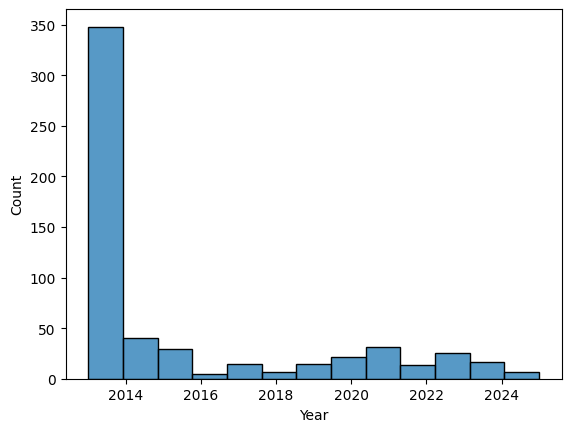

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# This is an exploratory graph to see the distribution of the data
sns.histplot(FF6_clean['Year'])

In [20]:
# This is changing the Rating variable into the appropriate form for further analysis and checking for missing values
FF6_clean['Rating'] = pd.to_numeric(FF6_clean['Rating'], errors='coerce')
print(FF6.dtypes, '\n')
print(FF6_clean["Rating"].isnull().sum())
print(FF6_clean["Title"].isnull().sum())

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int32
dtype: object 

17
0


In [28]:
# This code chunk is to seperate the scrapped data into datasets that are specific to the time periods we are investigating 
FF6_clean2013 = FF6_clean.loc[(FF6_clean["Year"] == 2013)]
FF6_clean_dec = FF6_clean.loc[(FF6_clean["Year"] >= 2023) & (FF6_clean["Year"] < 2025)]

# Here, any misisng data in the rating column is imputed with the mean rating value specific to the time periods ( 2013 vs decade later)
print(FF6_clean2013["Rating"].isnull().sum())
missing_val = FF6_clean2013['Rating'].median()
FF6_clean2013['Rating'] = FF6_clean2013['Rating'].fillna(missing_val)
print(FF6_clean2013["Rating"].isnull().sum())
FF6_clean2013

FF6_clean2013['Rating'].unique()

FF6_clean2 = pd.concat([FF6_clean2013, FF6_clean_dec])
print(FF6_clean2["Rating"].isnull().sum())




10
0
0


/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_1863/2834107723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FF6_clean2013['Rating'] = FF6_clean2013['Rating'].fillna(missing_val)


In [32]:
FF6_clean_dec.to_csv('FF6_clean_dec.csv')
FF6_clean2013.to_csv('FF6_clean2013.csv')
# exporting these to a CSV file to manually input missing Content values from IMdb

In [39]:
FF6_clean2013_2 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/Cleaned Data/FF6_clean2013_2.csv')
FF6_clean_dec2 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/Cleaned Data/FF6_clean_dec_2.csv')

In [40]:
# Since the data was reloaded, the date will need to be changed again
FF6_clean2013_2['Date'] = pd.to_datetime(FF6_clean2013_2['Date'])
sample3 = FF6_clean2013_2['Date'].dt.year
FF6_clean2013_2['Year'] = sample3
FF6_clean2013_2

/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_1863/1215776508.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  FF6_clean2013_2['Date'] = pd.to_datetime(FF6_clean2013_2['Date'])


,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
0,0,8,"""This is vehicular warfare.""",I don't think many other franchises has been a...,Al_The_Strange,2013-05-24,2013
1,1,8,A big movie and a fun time!,"Well, this was unexpected! Going into this fil...",pablo2896,2013-05-24,2013
2,4,7,Movin' on up!,While most franchises lose their steam with ea...,moviewizguy,2013-05-16,2013
3,6,7,"As if a Tank wasn't enough, they got a Plane too",Fast & Furious over the last few installments ...,KrazzyDJ,2013-05-26,2013
4,8,6,Indeed a guy's movie...,The faster the cars in this franchise seem to ...,paul_haakonsen,2013-09-01,2013
...,...,...,...,...,...,...,...
343,568,7,Knows its audience and works well as a result,There is something for films that know their p...,bob the moo,2013-09-14,2013
344,570,7,All Roads lead to this.,Fast and Furious 6.Well the movie carries one ...,bluesman-20,2013-12-18,2013
345,571,7,Exciting mechanics,"We don't watch these for the superb insights, ...",chaos-rampant,2013-07-21,2013
346,572,7,"fast6, then a 7?","Okay when the original ""fast and the furious"" ...",hawaiiwarrior08,2013-06-23,2013


In [46]:
# This code chunk is to filter out and only include movie reviews from the first four weeks of the films release, remove an unncessary column, and rearrange the data in ascending order.
FF6_clean2013_2 = FF6_clean2013_2.loc[(FF6_clean2013_2["Date"] >= '2013-05-23') & (FF6_clean2013_2["Date"] <= '2013-06-23')]
FF6_clean2013_2
FF6_clean2013_2 = FF6_clean2013_2.sort_values(by="Date", ascending = True)
# This dataset only include reviews from a month since the movies intial release
#FF6_clean2013_2 = FF6_clean2013_2.drop("Unnamed: 0", axis = 'columns')
FF6_clean2013_2
#FF6_clean2013_2

FF6_clean2013_2.to_csv('FF6_clean2013_2.csv')

In [ ]:
# same cleaning for the other newly reloaded dataset done here and the next code chunk
FF6_clean_dec2['Date'] = pd.to_datetime(FF6_clean_dec2['Date'])
sample4 = FF6_clean_dec2['Date'].dt.year
FF6_clean_dec2['Year'] = sample4
FF6_clean_dec2

In [48]:
FF6_clean_dec2['Date'] = pd.to_datetime(FF6_clean_dec2['Date'])
sample5 = FF6_clean_dec2['Date'].dt.year
FF6_clean_dec2['Year'] = sample5
FF6_clean_dec2

FF6_clean_dec2 = FF6_clean_dec2.drop("Unnamed: 0", axis = 'columns')
FF6_clean_dec2 = FF6_clean_dec2.sort_values(by="Date", ascending = True)
FF6_clean_dec2

,Rating,Title,Content,Author Name,Date,Year
24,9,Superb ACTION movie!,Fast and Furious 6 is an exciting action movie...,daniel_roettger,2023-03-24,2023
35,5,The Road To Fast X,Fast & Furious 6 was released In 2013\nThis in...,jasonmichaeld,2023-04-08,2023
34,8,Impressive action sequences,The follow up sequel to the critically acclaim...,Floated2,2023-04-12,2023
30,8,Fast & Furious 6 Was An Improvement After The ...,Fast & Furious 6 was an improvement after the ...,HabibieHakim123,2023-04-15,2023
14,6,Enjoyable,The last film in the franchise released in Pau...,ashfordofficial,2023-05-07,2023
18,7,"Entertaining, but a letdown from Fast 5","It's great having all of the ""family "" returni...",ThereelscoopwithKK,2023-05-09,2023
5,7,Maybe the best in the franchise,Five was the movie that changed the direction ...,Jithindurden,2023-05-09,2023
9,6,Furious 6,"I really quite enjoyed F&F5 (2011), but this o...",CinemaSerf,2023-05-15,2023
25,8,Over the top action sequences better seen on t...,(2013) Fast And Furious 6\nACTION ADVENTUREThe...,jordondave-28085,2023-05-16,2023
15,6,The one with the longest runway ever,"From an action perspective, ""Fast & Furious 6""...",jace_the_film_guy,2023-05-16,2023


In [49]:
FF6_clean_dec2.to_csv('FF6_clean_dec2.csv')

In [57]:
# Summary statistics for the data appendix
FF6_clean2013_2['Rating'].describe()

count    207.000000
mean       6.888889
std        2.475555
min        1.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Rating, dtype: float64

In [56]:
FF6_clean_dec2['Rating'].describe()

count    42.000000
mean      7.047619
std       1.622290
min       4.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      10.000000
Name: Rating, dtype: float64

(array([15850., 15854., 15857., 15861., 15865., 15869., 15873., 15877.]),
 [Text(15850.0, 0, '2013-05-25'),
  Text(15854.0, 0, '2013-05-29'),
  Text(15857.0, 0, '2013-06-01'),
  Text(15861.0, 0, '2013-06-05'),
  Text(15865.0, 0, '2013-06-09'),
  Text(15869.0, 0, '2013-06-13'),
  Text(15873.0, 0, '2013-06-17'),
  Text(15877.0, 0, '2013-06-21')])

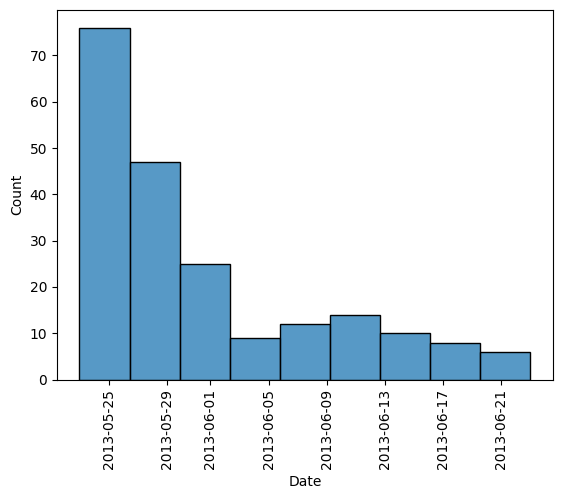

In [58]:
# Graphs of the newly cleaned data to get an better picture of its makeup and how to go further with our analysis
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='Date',data=FF6_clean2013_2)
plt.xticks(rotation=90)

(array([19417., 19478., 19539., 19601., 19662., 19723., 19783., 19844.,
        19905., 19967., 20028.]),
 [Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01'),
  Text(19783.0, 0, '2024-03'),
  Text(19844.0, 0, '2024-05'),
  Text(19905.0, 0, '2024-07'),
  Text(19967.0, 0, '2024-09'),
  Text(20028.0, 0, '2024-11')])

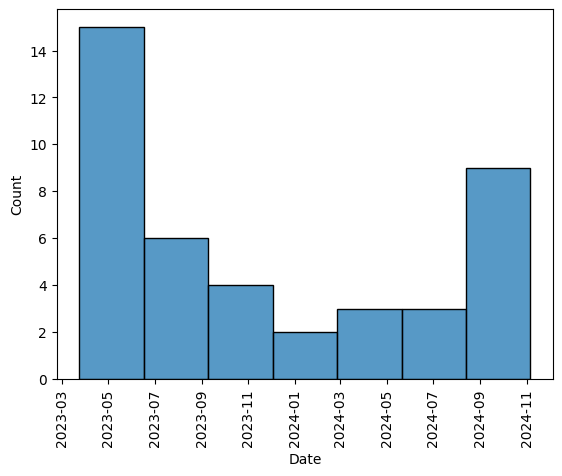

In [59]:
sns.histplot(x='Date',data=FF6_clean_dec2)
plt.xticks(rotation=90)

<Axes: xlabel='Rating'>

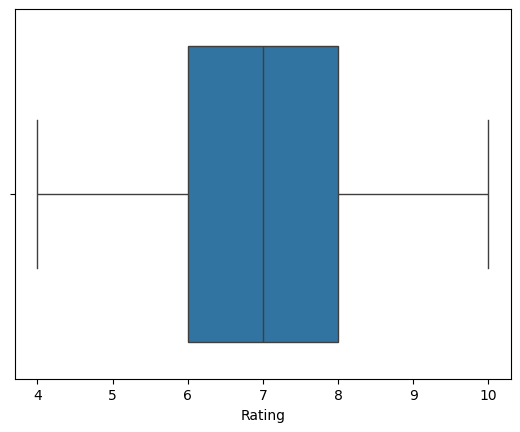

In [54]:
sns.boxplot(data=FF6_clean_dec2, x="Rating")

<Axes: xlabel='Rating'>

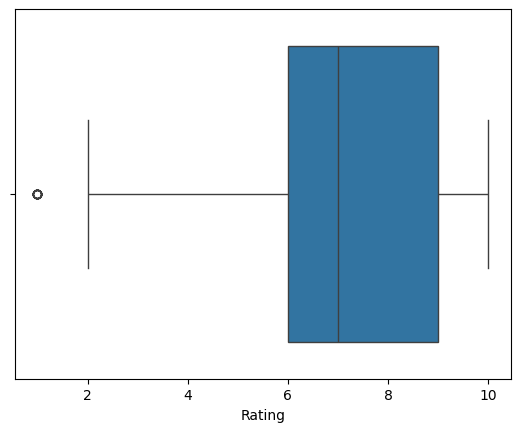

In [55]:
sns.boxplot(data=FF6_clean2013_2, x="Rating")